In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LoR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_10_Heart_Disease.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Checkig for the null values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing or null values are present in dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All data type is either float or int, no object datatype is present

In [8]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
data.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
data.fbs.unique()

array([1, 0], dtype=int64)

In [11]:
data.sex.unique()

array([1, 0], dtype=int64)

In [12]:
data.target.unique()

array([1, 0], dtype=int64)

Only two target values are present i.e. 1 and 0 it will be a classification problem

In [13]:
#Lets check the correlation of dataset

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


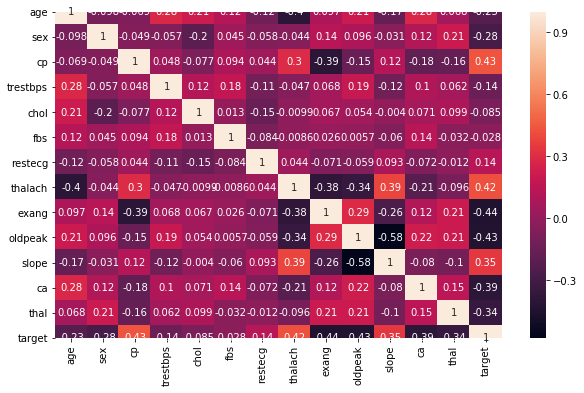

In [14]:
#Lets check the correlation of dataset
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

From the above observation, we can say that most columns are moderately correlated with target column.

fbs is weakely correlated with target.

Target is highly correlated with cp and thalach

oldpeak and slope is very highly negatively correlated with each other


num: diagnosis of heart disease (angiographic disease status)

-- Value 0: < 50% diameter narrowing

-- Value 1: > 50% diameter narrowing

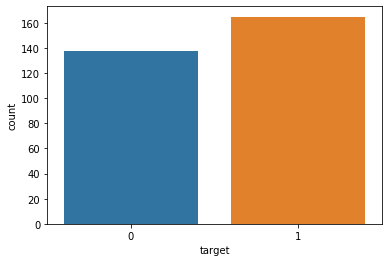

1    165
0    138
Name: target, dtype: int64

In [15]:
#Checking target column graphicaly

sns.countplot(x='target',data=data)
plt.show()

data.target.value_counts()

Observation:
    165 people is having heart problem
    138 poeple is not having heart problem 

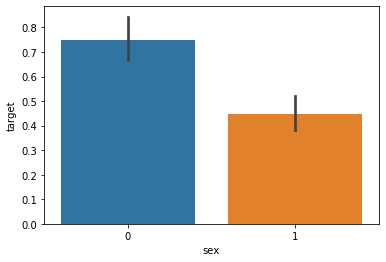

In [16]:
#Checking for sex

sns.barplot(x='sex',y='target',data=data)
plt.show()

From the observation, females are more likely to have heart problems than males

In [17]:
#Checking for chest pain

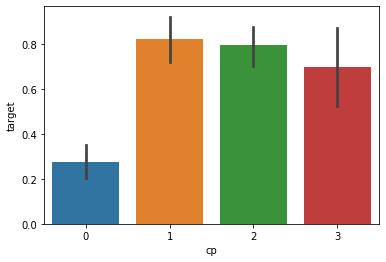

In [18]:
sns.barplot(x='cp',y='target',data=data)
plt.show()

cp: chest pain type

-- Value 1: typical angina

-- Value 2: atypical angina

-- Value 3: non-anginal pain

-- Value 4: asymptomatic

From the above figure, the chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems 

And cp i.e. 1 is likely to have more heart problem

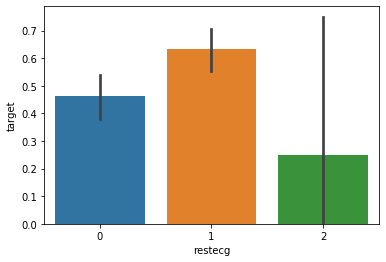

In [19]:
#Checking for restecg
sns.barplot(x='restecg',y='target',data=data)
plt.show()

From the observation, restecg 1 is having more heart problem, 0 is having moderate and 2 having less heart problem

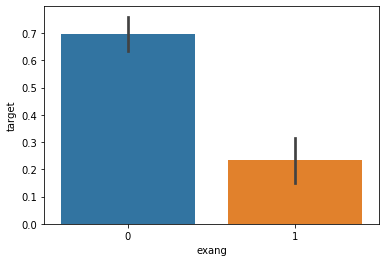

In [20]:
#Checking for exang
sns.barplot(x='exang',y='target',data=data)
plt.show()

Exang 1 is having less heart problem

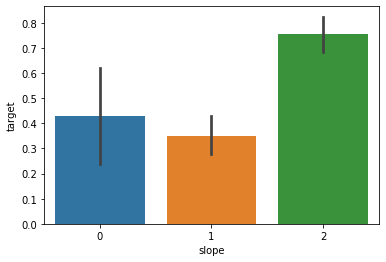

In [21]:
#Checking for slope
sns.barplot(x='slope',y='target',data=data)
plt.show()

slope with 1 is having less heart problem compare to 0 and 2

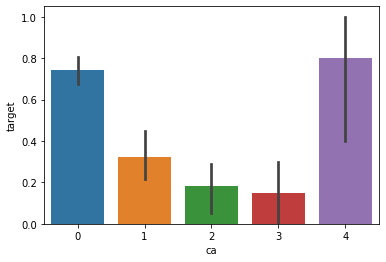

In [22]:
#Checking for ca
sns.barplot(x='ca',y='target',data=data)
plt.show()

From the observation, poeple with 4 and 0 is having more problem.

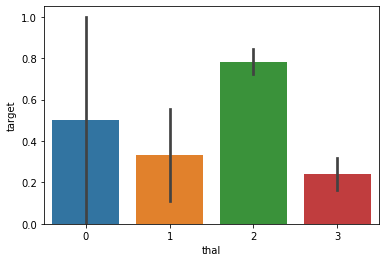

In [23]:
#Checking for thal
sns.barplot(x='thal',y='target',data=data)
plt.show()

From the observation thal with value 1 and 3 is likely to have less heart problem.

In [24]:
#Lets check describtion

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the observation there is huge difference betwenn 75% and max value of oldpeak, thalach, chol and age



age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trestbps    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalach           AxesSubplot(0.125,0.125;0.0945122x0.343182)
exang          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
slope          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
ca             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
thal           AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target         AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

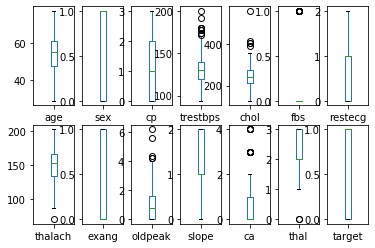

In [25]:
#Checkign for the outliers
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,7))

Few outliers are presnet in ca, chol, fbs, oldpeak.

In [26]:
data.shape

(303, 14)

In [27]:
#removing outliers present
from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

In [28]:
data.shape

(287, 14)

In [29]:
#Dividing the data to x and y

x = data.iloc[:,0:-1]
y = data.target

In [30]:
x.skew()

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.530712
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.984256
slope      -0.503916
ca          1.211037
thal       -0.190864
dtype: float64

In [31]:
#Removing skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [32]:
x.skew()

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.172190
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.331394
slope       0.027892
ca          0.765030
thal       -0.190864
dtype: float64

In [33]:
#Scaling data
#Using standard scaler 
ss=SS()
ss.fit(x)
x=ss.transform(x)

In [34]:
def best_model(model):
    i = 0
    max_accu_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        accu_score = accuracy_score(test_y,pred_y)
        accu_score = round(accu_score*100)
        if accu_score > max_accu_score:
            max_accu_score = accu_score
            final_r_state = r_state
    print("Max Accuracy Score Corresponding to random state ", final_r_state, " is ",max_accu_score)    

#### Logistic Regression

In [35]:
lor = LoR()
best_model(lor)

Max Accuracy Score Corresponding to random state  81  is  93.0


#### NAIVE BAYES

In [36]:
gnb = GNB()
best_model(gnb)

Max Accuracy Score Corresponding to random state  50  is  90.0


#### SVM

In [37]:
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [38]:
svc=SVC(kernel="linear",C=0.1)
best_model(svc)

Max Accuracy Score Corresponding to random state  45  is  93.0


#### KNN

In [39]:
neighbors = {"n_neighbors":range(1,30)}
knn = KNC()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 24}

In [40]:
knn = KNC(n_neighbors=18)
best_model(knn)

Max Accuracy Score Corresponding to random state  50  is  93.0


#### DTC

In [41]:
dtc=DTC()
best_model(dtc)

Max Accuracy Score Corresponding to random state  93  is  88.0


#### RFC

In [42]:
rfc = RFC() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 200}

In [43]:
rfc=RFC(n_estimators=50)
best_model(rfc)

Max Accuracy Score Corresponding to random state  78  is  91.0


FROM THE ABOVE ALL OBSERVATION WE ARE CONCLUDING WITH KNN AS IT GAVES US HIGHEST ACCURACY SCORE. SO WE ARE SAVING KNN TO SAVE OUR FINAL MODEL.

In [44]:
#KNN gave max score for random state = 50
knn = KNC(n_neighbors=18)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=50)
knn.fit(train_x,train_y)
pred_y = knn.predict(test_x)
accuracy_score = accuracy_score(test_y,pred_y)
accuracy_score = round(accuracy_score*100)
print("ROC AUC score is : ", accuracy_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

ROC AUC score is :  93.0
Confusion matrix is

[[22  4]
 [ 0 32]]
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.89      1.00      0.94        32

    accuracy                           0.93        58
   macro avg       0.94      0.92      0.93        58
weighted avg       0.94      0.93      0.93        58



### SAVING THE MODEL

In [45]:
joblib.dump(knn, 'Project_10_Heart_Disease.pkl')

['Project_10_Heart_Disease.pkl']

#### CONCLUSION

In this project, we have used multiple algorith of ML to predict heart disease. After importing the data, I analysed it using plots. Then I applied multiple machine learning algorithm to train and test the model. With various parameters we have test this model and came to conclude that, KNN has performed well as compare to other and gave the best accuracy socre of 93%.